In [1]:
import pandas as pd
import pymongo
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import missingno as mno
from sklearn.feature_extraction.text import TfidfVectorizer # For extracting the features from the tweet text
from sklearn.linear_model import LogisticRegression #To build a logistic model
from sklearn.metrics import accuracy_score  #To obtain the evaluation metrics
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.7.0


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
ten = pd.read_csv('ten.csv')
ten

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Unnamed: 13
0,à®…à®œà®¯à¯,Singapore,ThalapathY Vijay Veriyan - Thala Dhoni Fanatic...,2010-07-11 16:43:44,804,2421,185905,False,2020-10-27 23:51:31,Series Schedule..\nðŸ”¥ðŸ”¥ðŸ”¥ðŸ”¥\n#INDvsAUS...,"['INDvsAUS', 'IPL2020']",Twitter for Android,False,..
1,Live Cricket Score #PAKvZIM #IPL2020 #IPL13,NaN,Cricket Score Alerts From \nICC\n for all Matc...,2013-12-10 03:18:40,51618,155,2559,False,2020-10-27 23:33:56,"Sunrisers Hyderabad 219 for 2 (Saha 87, Warner...",['IPL2020'],Twitter for Android,False,NaN
2,Hotstar Canada,Canada,Cricket ðŸ| Entertainment ðŸ“º | Movies ðŸŽ¥...,2017-07-17 11:28:36,2144,29,46,True,2020-10-27 23:30:00,Hint: He has been in the news of late! ðŸ§\n\...,"['Dream11IPL', 'CricketYourWay', 'MIvRCB', 'IP...",TweetDeck,False,NaN
3,Hotstar USA,United States,Cricket ðŸ| Entertainment ðŸ“º | Movies ðŸŽ¥...,2017-07-17 11:13:03,6649,55,146,True,2020-10-27 23:30:00,Hint: He has been in the news of late! ðŸ§\n\...,"['Dream11IPL', 'CricketYourWay', 'MIvRCB', 'IP...",TweetDeck,False,NaN
4,SPSandhu,Australia,Proud Indian; Works in Australian Health ........,2010-04-15 14:43:20,58,381,917,False,2020-10-27 23:27:25,Story of @kxipofficial ðŸ¦ðŸ¦ðŸ’ªðŸ¼ðŸ’ªðŸ...,"['ipl2020', 'lovekxip', 'sheraandikaumpunjabi']",Instagram,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218053,FreeHit Fantasy,India,The king of fantasy gaming is here. Experience...,2020-02-04 10:49:19,107,107,10,False,2020-10-01 00:10:28,The long weekend begins with an exciting match...,"['punjab', 'mumbai']",Twitter for Android,False,NaN
218054,Parth Parikh,Planet Earth,kai karvu che!,2018-04-07 23:29:00,7,35,0,False,2020-10-01 00:07:47,was impressed by #Nagarkoti bowling from U19 w...,"['Nagarkoti', 'kkr', 'ipl2020']",Twitter for iPhone,False,NaN
218055,Cricket Schedule & Stats,Mumbai,"Breaking news, schedule & cricket alerts\nFoll...",2015-03-02 22:38:42,105,122,13,False,2020-10-01 00:03:49,Virat Kohli and AB de Villiers batting partner...,['IPL2020'],Twitter Web App,False,NaN
218056,Jimmy,Loiner City Region,"They took all our players away, banned our cap...",2009-10-02 23:24:57,148,463,5793,False,2020-10-01 00:01:56,One of these days Geoffrey Boycott needs to co...,['IPL2020'],Twitter for Android,False,NaN


In [ ]:
import pandas as pd
from pymongo import MongoClient
client = pymongo.MongoClient('mongodb://localhost:27017/')
# Connect to MongoDB
# client = MongoClient()
db = client['test']
collection = db['work']

# Read xlsx file into a dataframe
df = pd.read_csv('nine.csv')

# Convert dataframe to a list of documents
documents = df.to_dict(orient='records')

# Insert the documents into the collection
collection.insert_many(documents)

In [ ]:
cursor = collection.find()
# print(cursor)

for document in cursor:
    df = document

In [ ]:
from pyspark.sql import SparkSession

# create a SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

# read CSV file into a DataFrame

In [ ]:
df = spark.read.csv("ten.csv", header=True)

# show the DataFrame
df.show()

In [ ]:
dff = df.toPandas()

In [ ]:
dff

In [3]:

df = pd.read_csv('IPL2020_Tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,GAURAV DHANAWAT 🇮🇳,"Delhi,India",Live EVS Operator/Coordinator | EX Ten Sports ...,2009-04-02 17:06:11,147,127,205,False,2020-11-11 23:49:24,Time to change the Bubble from #IPL2020 to #IS...,"['IPL2020', 'ISL2020']",Twitter for iPhone,False
1,🇮🇳🇮🇳 शुभम दोहरे 🇮🇳🇮🇳,"Bhopal, India",👉💯%Bhopali😎\n👉B+🔥\n👉Proud to be an #indian🇮🇳\n...,2016-11-10 05:09:33,113,699,1412,False,2020-11-11 23:33:51,Why is #2020Fixing trending?? \n\nI think rcb ...,['2020Fixing'],Twitter for Android,False
2,Steven Gordon,"Carrickfergus, Northern Irelan","Buns are good but puns are better, best served...",2013-04-03 15:03:09,27,57,41,False,2020-11-11 23:04:46,@ICC And still #rajasthanroyals finished last...,"['rajasthanroyals', 'JofraArcher', 'RR', 'jofr...",Twitter for Android,False
3,Bhumish Patel,Montreal Canada,"Student at Concordia University, Montreal, CA\...",2013-07-04 16:24:47,131,1525,10343,False,2020-11-11 23:00:51,I still remember the bus parade after @mipalta...,NaN,Twitter Web App,False
4,cricket22yards,NaN,We are a cricketing blog highly focusing on th...,2016-09-02 19:14:03,551,189,160,False,2020-11-11 22:39:50,"#IPL2020 \n\nSTATS: Most runs, fastest fifties...",['IPL2020'],Twitter Web App,False


In [4]:
df.shape

(572984, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572984 entries, 0 to 572983
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         572984 non-null  object
 1   user_location     430647 non-null  object
 2   user_description  525309 non-null  object
 3   user_created      572984 non-null  object
 4   user_followers    572984 non-null  int64 
 5   user_friends      572984 non-null  int64 
 6   user_favourites   572984 non-null  int64 
 7   user_verified     572984 non-null  bool  
 8   date              572984 non-null  object
 9   text              572984 non-null  object
 10  hashtags          462895 non-null  object
 11  source            572874 non-null  object
 12  is_retweet        572984 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 49.2+ MB


In [6]:
df.isnull().sum()

user_name 0
user_location 142337
user_description 47675
user_created 0
user_followers 0
user_friends 0
user_favourites 0
user_verified 0
date 0
text 0
hashtags 110089
source 110
is_retweet 0
dtype: int64

In [7]:
df['senttext'] = df['text']

In [8]:
df = df.apply(lambda x: x.astype(str).str.lower())

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2312 (\N{DEVANAGARI LETTER II}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_f

<AxesSubplot:>

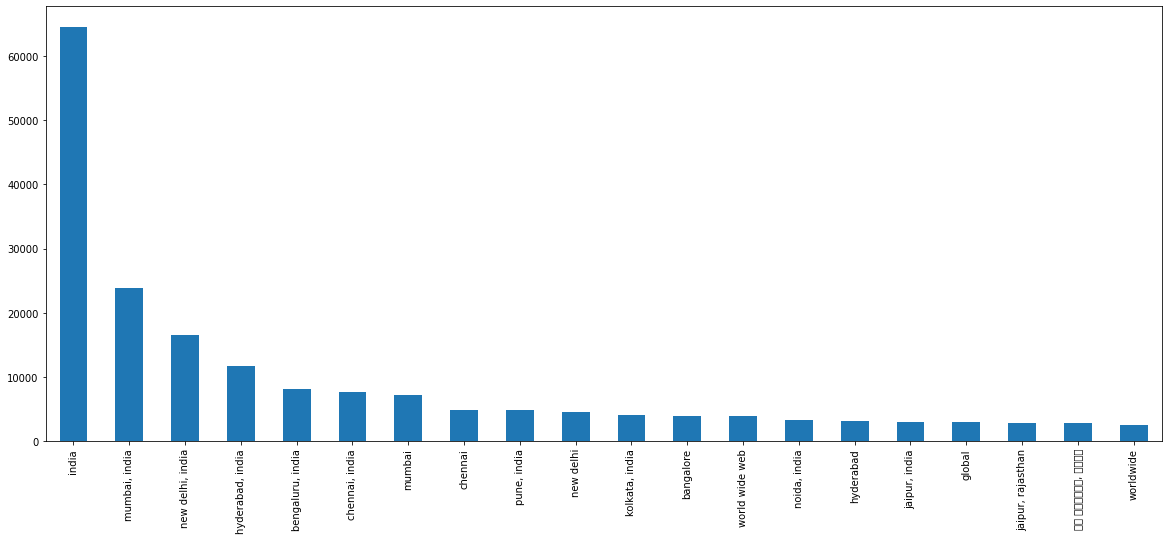

In [9]:
loc_df = df[df.user_location != 'nan']
loc_df.user_location.value_counts().nlargest(20).plot(kind='bar',figsize=(20,8))
# df..value_counts().nlargest(20).plot(kind='bar')

In [10]:
indian_cities = {}
indian_metros = ['mumbai', 'bangalore', 'delhi', 'kolkata', 'chennai', 'ahmedabad', 'hyderabad']
for city in indian_metros: 
    indian_cities[city] = df.user_location.str.count(city).sum()

In [11]:
import matplotlib.pyplot as plt

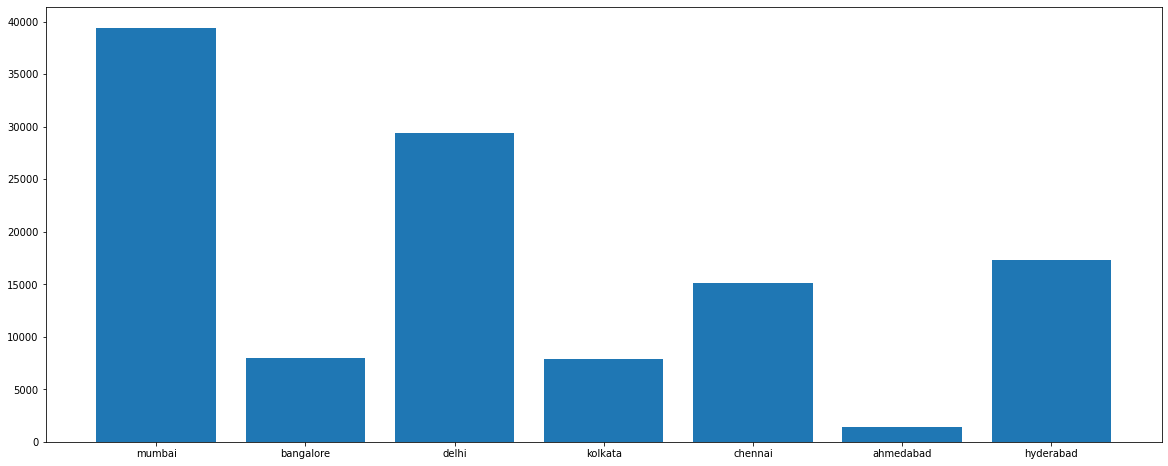

In [12]:
plt.figure(figsize=(20, 8))
plt.bar(*zip(*indian_cities.items()))

plt.show()

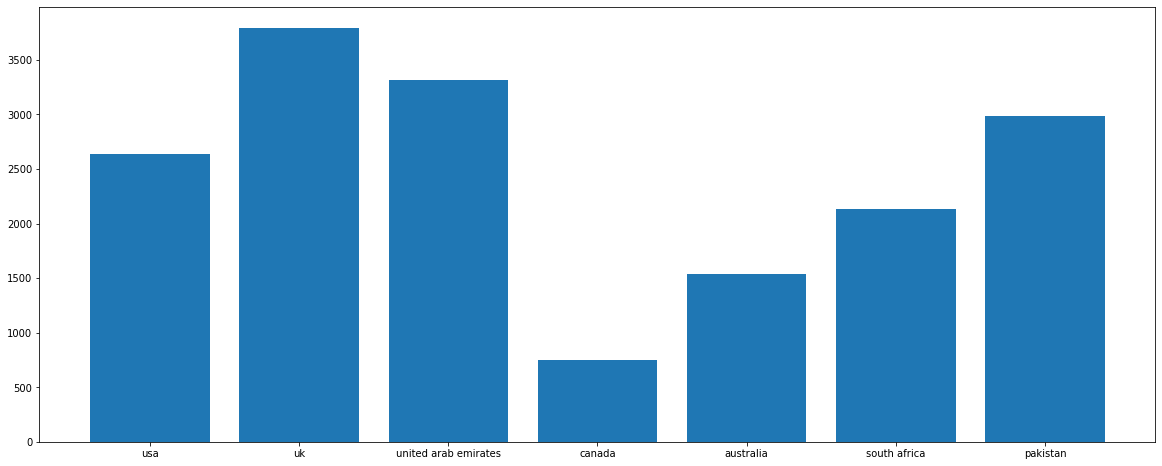

In [13]:
ipl_countries = {}
countries = ['usa', 'uk', 'united arab emirates', 'canada', 'australia', 'south africa', 'pakistan']
for country in countries: 
    ipl_countries[country] = df.user_location.str.count(country).sum()

    
plt.figure(figsize=(20, 8))
plt.bar(*zip(*ipl_countries.items()))

plt.show()

<AxesSubplot:>

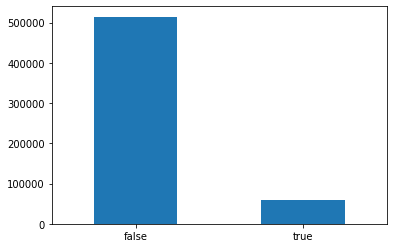

In [14]:
df.user_verified.value_counts().plot(kind='bar', rot=0)

<AxesSubplot:>

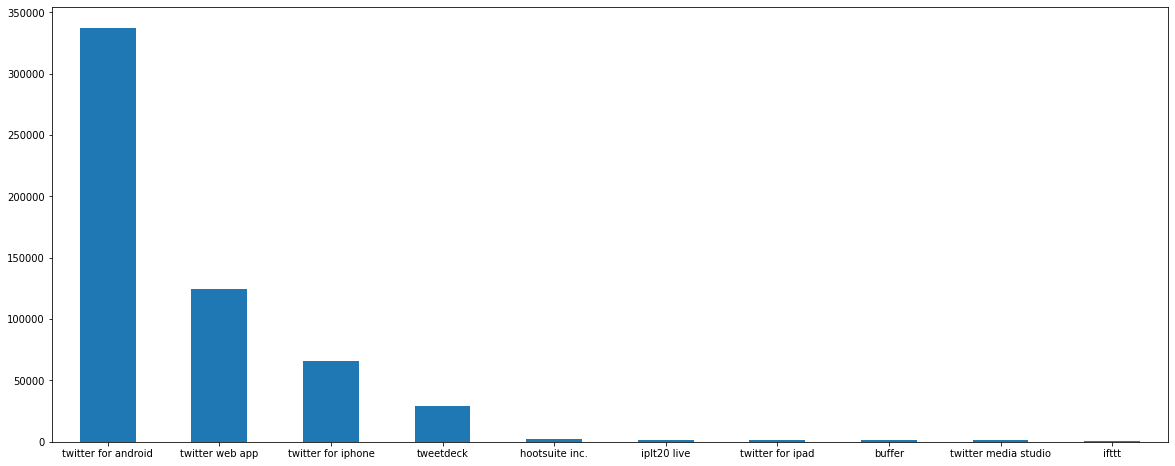

In [15]:
df.source.value_counts().nlargest(10).plot(kind='bar', rot=0, figsize=(20,8))

<AxesSubplot:>

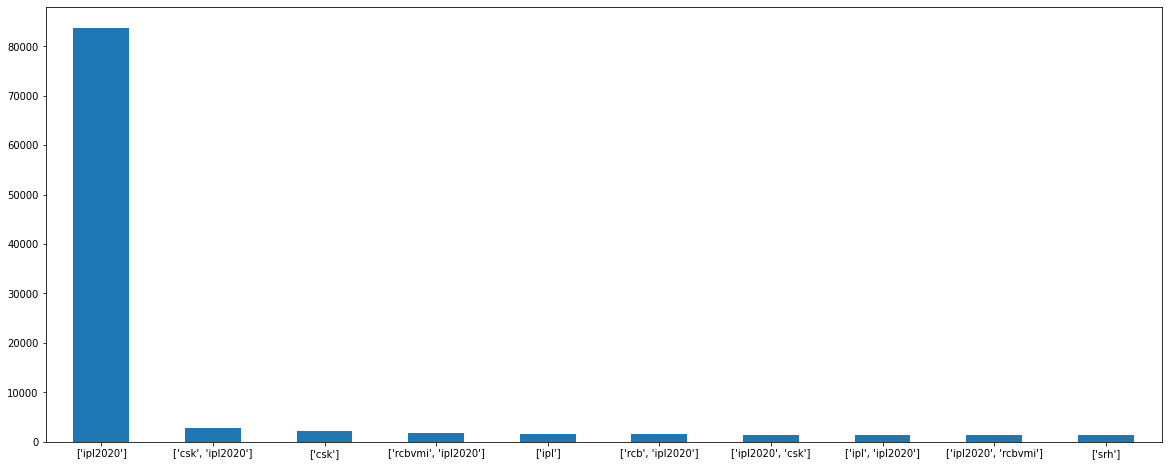

In [16]:
hashtag_df = df[df.hashtags != 'nan']
hashtag_df.hashtags.value_counts().nlargest(10).plot(kind='bar', rot=0, figsize=(20,8))

In [17]:
df.text = df.text.apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", x).split()))

In [18]:
df.text = df.text.apply(lambda x: ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", x).split()))

In [19]:
df.text = df.text.apply(lambda x: ' '.join(re.sub(r'http\S+', '', x).split()))

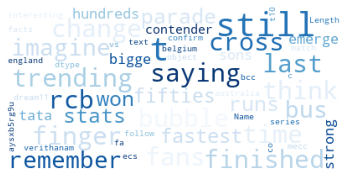

In [20]:
wordcloud = WordCloud(
                          background_color='white',
                          colormap='Blues',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['text']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
df['tweet_date']=pd.to_datetime(df['date']).dt.date
tweet_date=df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)

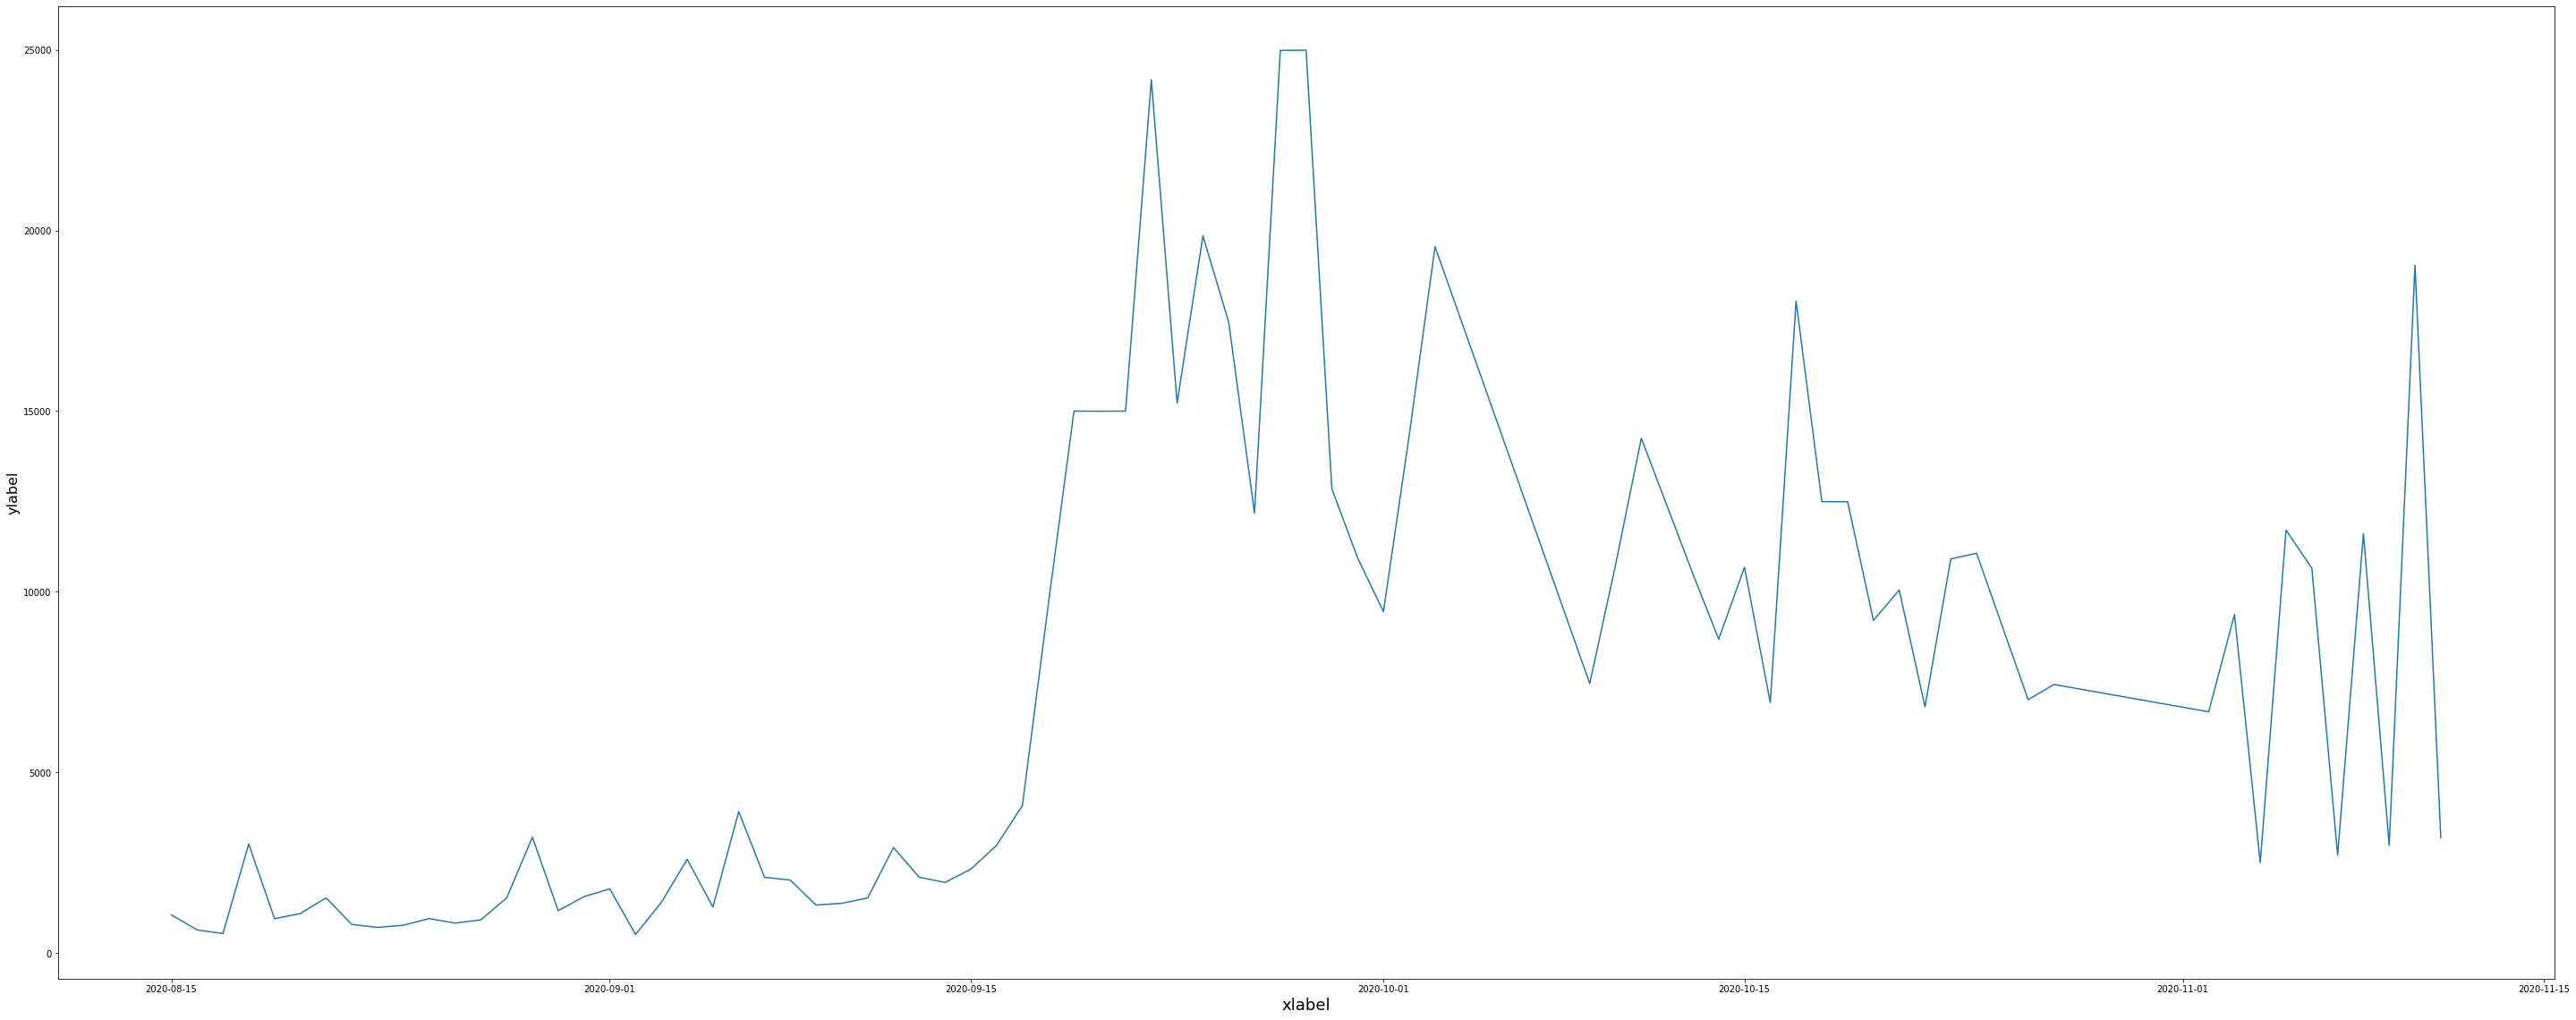

In [22]:
plt.figure (figsize=(50,20))
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.plot(tweet_date['date'], tweet_date['count'])

In [23]:
try:
    # UCS-4
    e = re.compile(u'[\U00010000-\U0010ffff]')
except re.error:
    # UCS-2
    e = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
emojis = []
for x in df.text:
    match  = e.search(x)
    if match:
        emojis.append(match.group())

In [24]:
dfe =  pd.DataFrame(emojis,columns=['text'])
pd.Series(' '.join(dfe['text']).lower().split()).value_counts()[:10]

🔥 16778
😂 9357
😍 6329
🏏 5224
👏 5216
💥 3682
😎 3520
👇 2795
🙏 2780
👍 2762
dtype: int64

In [25]:
analyser = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['senttext'].apply(lambda x: analyser.polarity_scores(str(x)))

In [26]:
def sentiment_func(sentiment):
#     print(s['pos'])
    for k,v in sentiment.items():
        if (k == 'pos' or k or 'neg' or k == 'neu') == True:
            if (sentiment['pos'] > 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] < 0.5) == True:
                return 'positive'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] > 0.5 and sentiment['neu'] < 0.5) == True:
                return 'negative'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] > 0.5) == True:
                return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(sentiment_func)

<AxesSubplot:>

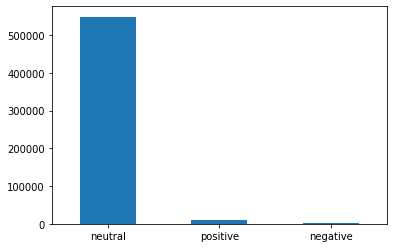

In [27]:
df.sentiment.value_counts().plot(kind='bar', rot=0)

In [28]:
ff = pd.read_csv('ten.csv')

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
ff.shape

(218058, 14)

In [30]:
ff['senttext'] = ff['text']

In [31]:
ff = ff.apply(lambda x: x.astype(str).str.lower())

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


<AxesSubplot:>

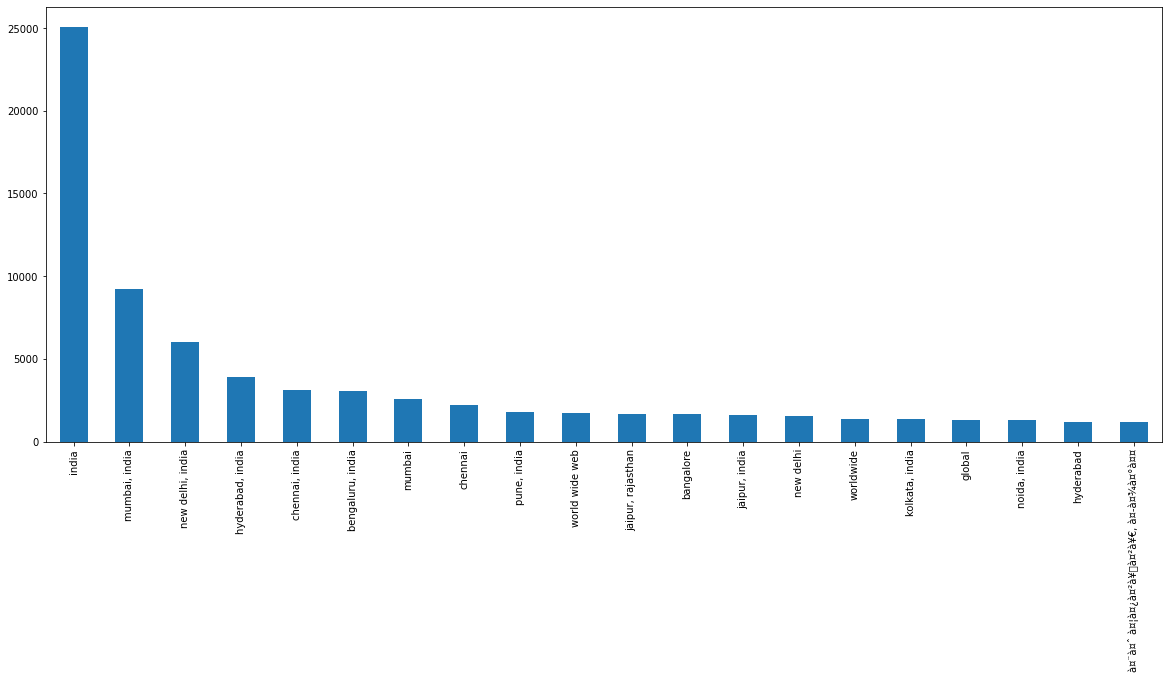

In [32]:
loc_ff = ff[ff.user_location != 'nan']
loc_ff.user_location.value_counts().nlargest(20).plot(kind='bar',figsize=(20,8))
# ff..value_counts().nlargest(20).plot(kind='bar')

In [33]:
indian_cities = {}
indian_metros = ['mumbai', 'bangalore', 'delhi', 'kolkata', 'chennai', 'ahmedabad', 'hyderabad']
for city in indian_metros: 
    indian_cities[city] = ff.user_location.str.count(city).sum()

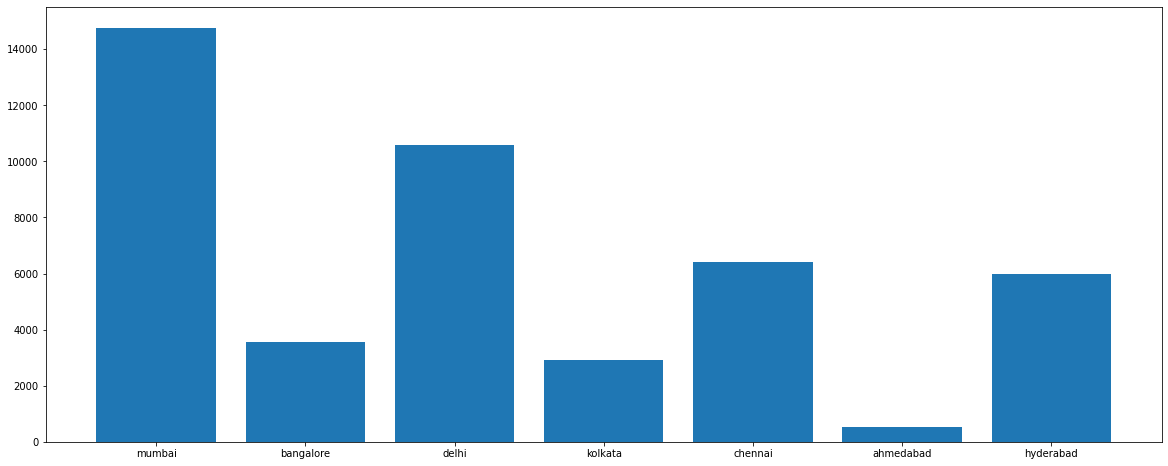

In [34]:
plt.figure(figsize=(20, 8))
plt.bar(*zip(*indian_cities.items()))

plt.show()

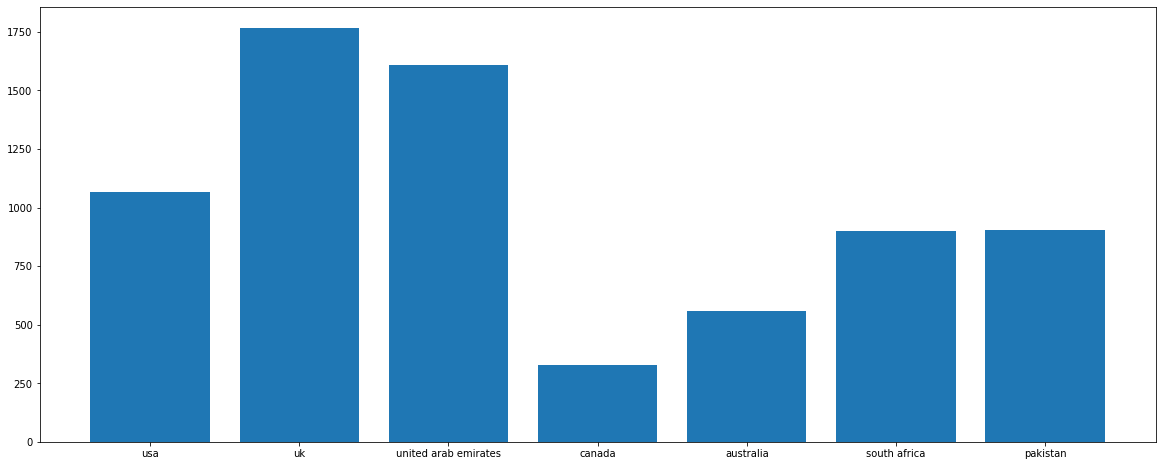

In [35]:
ipl_countries = {}
countries = ['usa', 'uk', 'united arab emirates', 'canada', 'australia', 'south africa', 'pakistan']
for country in countries: 
    ipl_countries[country] = ff.user_location.str.count(country).sum()

    
plt.figure(figsize=(20, 8))
plt.bar(*zip(*ipl_countries.items()))

plt.show()

<AxesSubplot:>

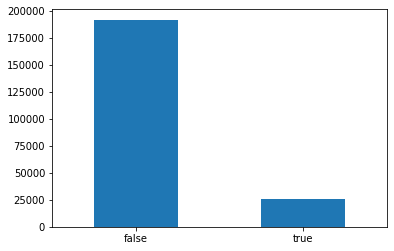

In [36]:
ff.user_verified.value_counts().plot(kind='bar', rot=0)

<AxesSubplot:>

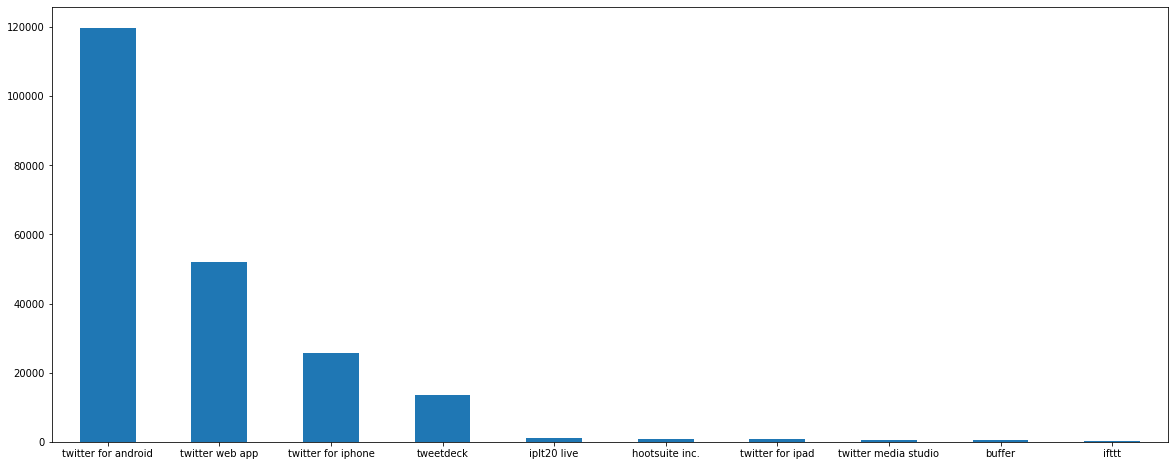

In [37]:
ff.source.value_counts().nlargest(10).plot(kind='bar', rot=0, figsize=(20,8))

<AxesSubplot:>

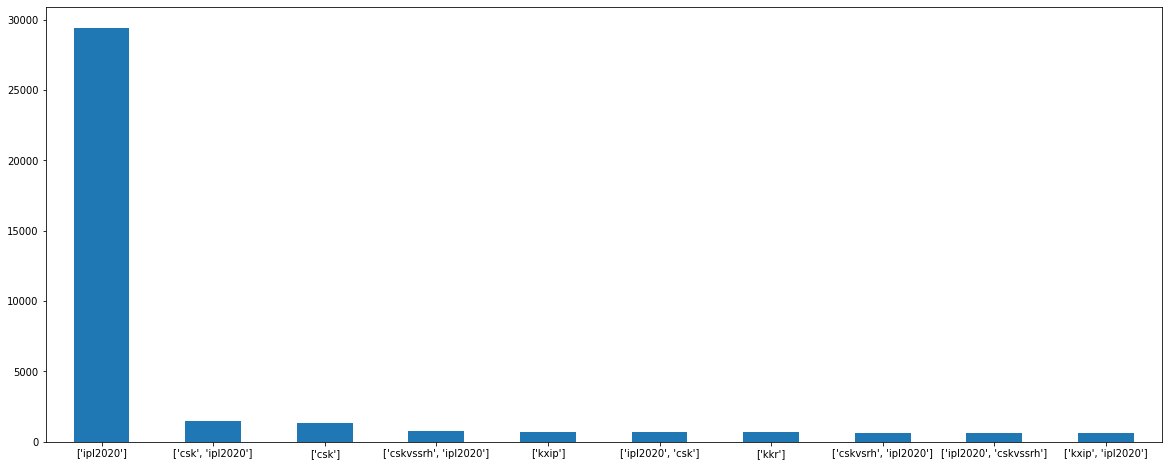

In [38]:
hashtag_ff = ff[ff.hashtags != 'nan']
hashtag_ff.hashtags.value_counts().nlargest(10).plot(kind='bar', rot=0, figsize=(20,8))

In [39]:
ff.text = ff.text.apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", x).split()))

In [40]:
ff.text = ff.text.apply(lambda x: ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", x).split()))

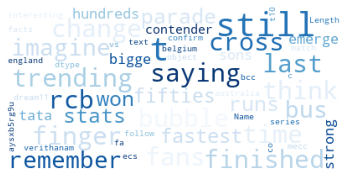

In [41]:
wordcloud = WordCloud(
                          background_color='white',
                          colormap='Blues',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['text']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [42]:
ff['tweet_date']=pd.to_datetime(ff['date']).dt.date
tweet_date=ff['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)

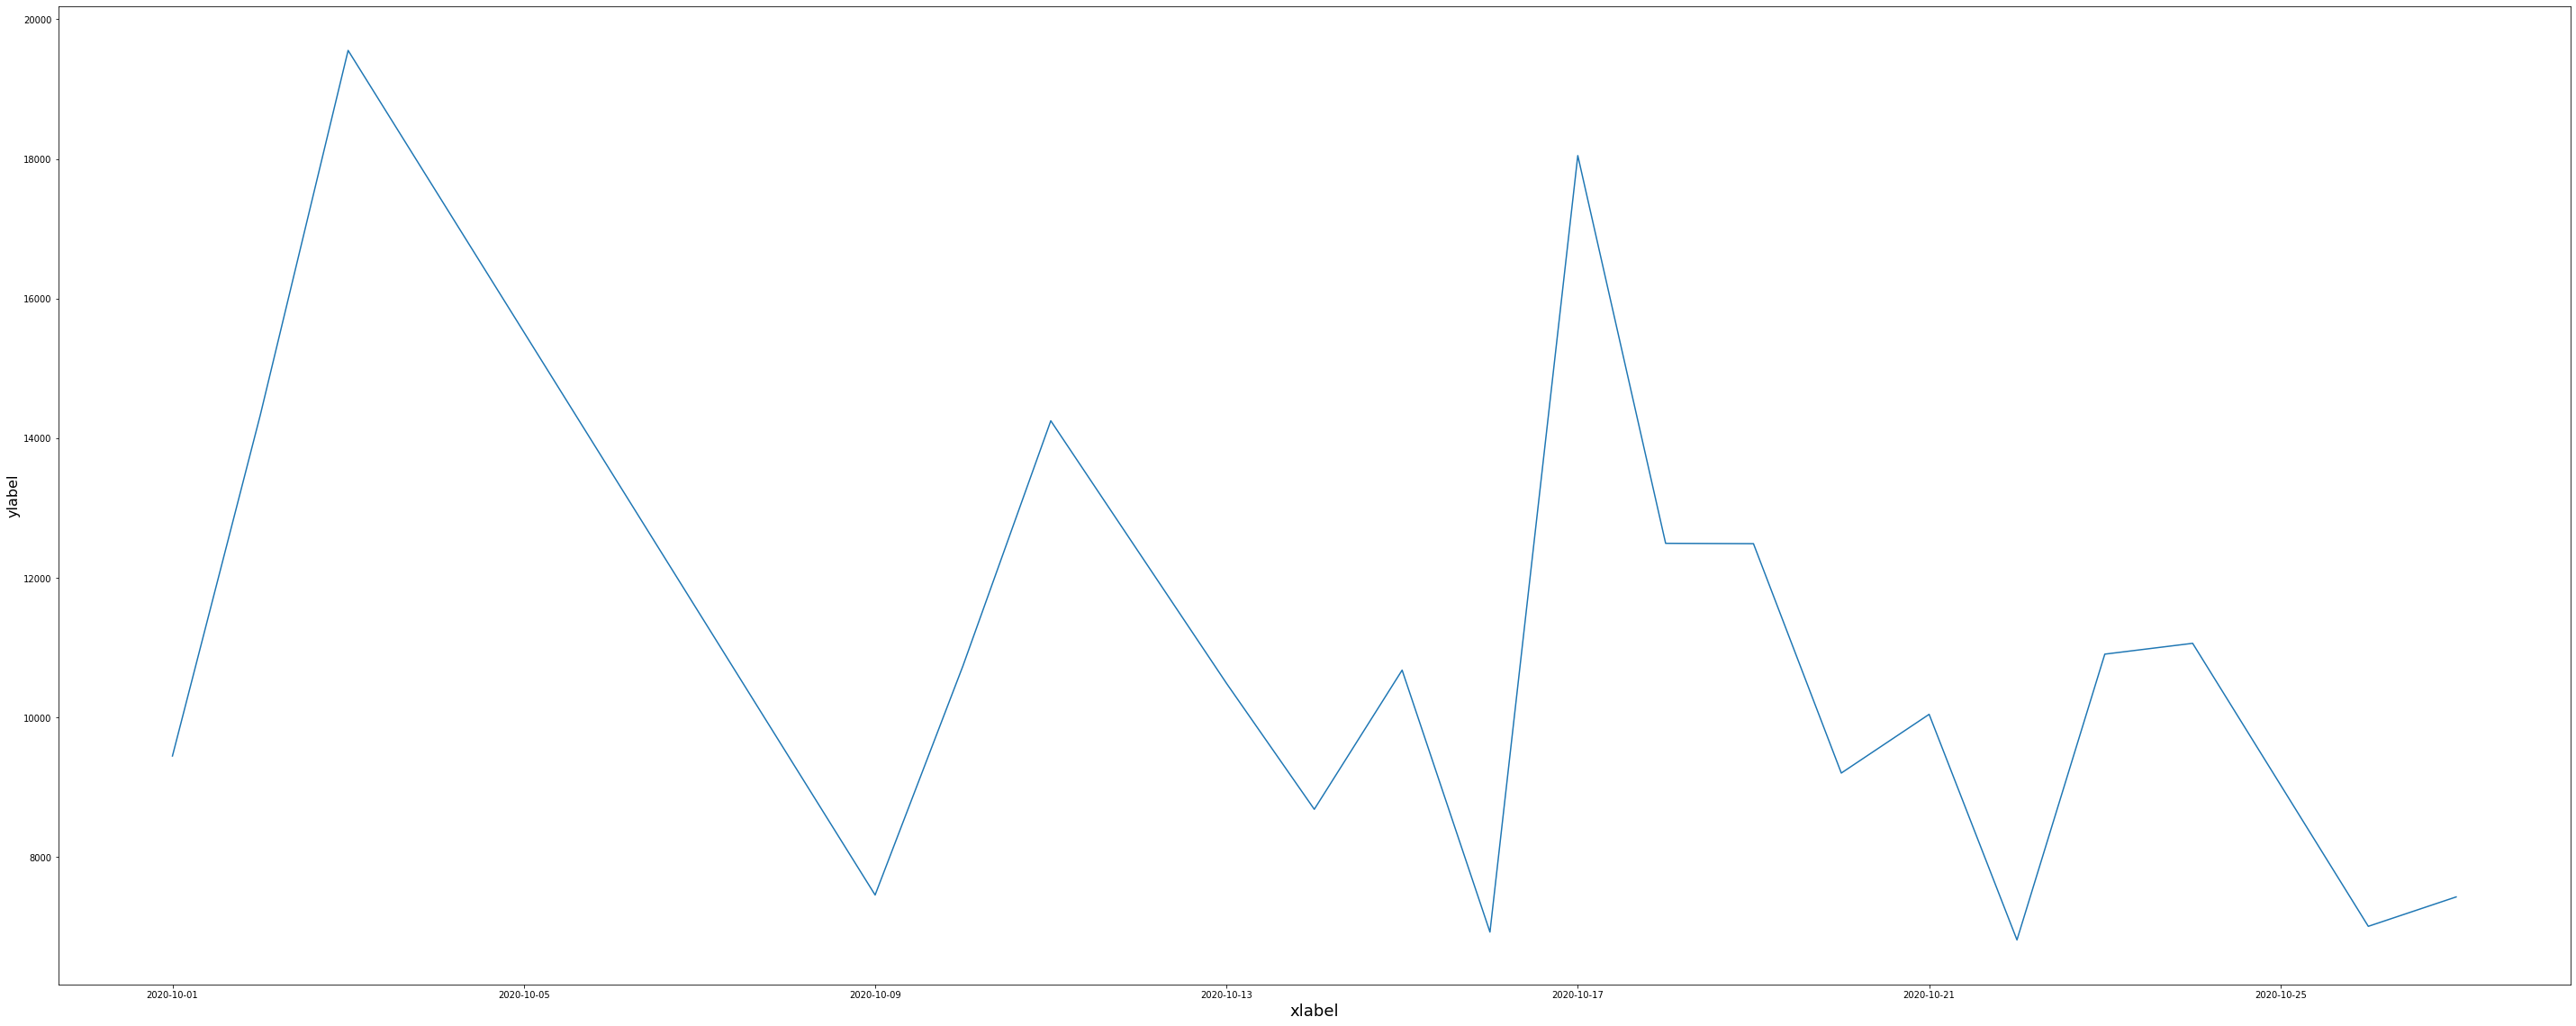

In [43]:
plt.figure (figsize=(50,20))
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.plot(tweet_date['date'], tweet_date['count'])

In [44]:
analyser = SentimentIntensityAnalyzer()

ff['sentiment_score'] = ff['senttext'].apply(lambda x: analyser.polarity_scores(str(x)))

In [54]:
def sentiment_func(sentiment):
#     print(s['pos'])
    for k,v in sentiment.items():
        if (k == 'pos' or k or 'neg' or k == 'neu') == True:
            if (sentiment['pos'] > 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] < 0.5) == True:
                return 'positive'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] > 0.5 and sentiment['neu'] < 0.5) == True:
                return 'negative'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] > 0.5) == True:
                return 'neutral'

ff['sentiment'] = ff['sentiment_score'].apply(sentiment_func)

<AxesSubplot:>

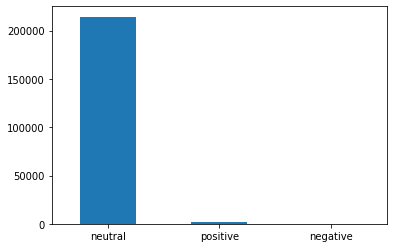

In [55]:
ff.sentiment.value_counts().plot(kind='bar', rot=0)

In [56]:
# Import all packages required for this project. 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import sys
import pandas
from sklearn.multiclass import OneVsRestClassifier
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [57]:
from sklearn.model_selection import GroupShuffleSplit

In [58]:
ff['sentiment'] = ff['sentiment'].dropna()

In [59]:
ff['text'] = ff['text'].dropna()

In [60]:
senti = ff['sentiment'].dropna()

In [61]:
ff['sentiment'] = senti

In [62]:
ff = ff.dropna()

In [63]:
ft= ff[['sentiment','text']]

In [64]:
ft.isnull().sum()

sentiment 0
text 0
dtype: int64

In [65]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [66]:
train, valid = train_test_split(ft, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train))
print("Test Data size", len(valid))

Train Data size: 173532
Test Data size 43384


In [67]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 

# !pip install millify
from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS
from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

import warnings
warnings.filterwarnings("ignore")
#importing the necessary libraries for preprocessing of the dataset
import nltk
import re
import string

In [68]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [69]:
ft['text'] = ft['text'].apply(lambda x: clean_text(x))

In [70]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [71]:
ft['text']=ft['text'].apply(lambda x: remove_emoji(x))

In [72]:
ft['text'].apply(lambda x:len(str(x).split())).max()

55

In [73]:
ft.head()
ft.isnull().sum()

sentiment 0
text 0
dtype: int64

In [149]:
# s = ft['sentiment'].dropna()  

In [99]:
# ft.isnull().sum()

sentiment 1142
text 0
dtype: int64

In [102]:
# ft['sentiment'] = s

In [150]:
ft.isnull().sum()

sentiment 0
text 0
dtype: int64

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text.values)
X_valid = vectorizer.transform(valid.text.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (173532, 158232)
X_train.shape :  (43384, 158232)
y_train.shape :  (173532,)
y_valid.shape :  (43384,)


In [75]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9883479704031534
Validation accuracy Score :  0.9882906140512632
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       1.00      0.99      0.99     43378
    positive       0.01      0.50      0.01         6

    accuracy                           0.99     43384
   macro avg       0.34      0.50      0.34     43384
weighted avg       1.00      0.99      0.99     43384



In [76]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

[13:30:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.9908086116681649
Validation accuracy Score :  0.9892356629172046
              precision    recall  f1-score   support

    negative       0.09      0.83      0.16         6
     neutral       1.00      0.99      0.99     43291
    positive       0.14      0.71      0.23        87

    accuracy                           0.99     43384
   macro avg       0.41      0.85      0.46     43384
weighted avg       1.00      0.99      0.99     43384

